In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
train = pd.read_csv("train_values.csv")
y_labels = pd.read_csv("train_labels.csv")

In [3]:
train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


In [4]:
train.fillna(train.mean(), inplace=True)
train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,1.024927,0.677685,147.273425,2666.152767,25.735519,14473.905464,13.887294,720.724311,893.291110,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,5.000000,1.000000,49.000000,3805.000000,11.191000,60071.000000,89.145000,963.000000,1323.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,5.000000,1.000000,79.000000,5099.000000,24.522000,68648.000000,100.000000,1364.000000,1797.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,5.000000,2.000000,112.000000,6379.000000,44.486000,74714.250000,100.000000,1754.000000,2275.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
train['co_applicant'] = le.fit_transform(train['co_applicant'])
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0


In [6]:
from sklearn.model_selection import train_test_split

# target
y = y_labels.pop('accepted')

# features
X = (train.values)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [8]:
X_train.shape, X_test.shape

((400000, 22), (100000, 22))

In [9]:
from sklearn.preprocessing import StandardScaler

# fit the scaler based upon the training set
scaler = StandardScaler().fit(X_train)

# scale the train features array 
X_train = scaler.transform(X_train)

# scale the test features array (based on the training fit)
X_test = scaler.transform(X_test)

In [10]:
print(X_train)

[[ 1.37210005e+00 -5.30067886e-01 -2.06390170e-01 ... -3.64450745e-01
   1.37043465e+00  1.22455990e+00]
 [ 1.36542098e+00 -5.30067886e-01 -2.06390170e-01 ...  1.02485815e+00
   1.37043465e+00 -8.16619912e-01]
 [-8.21338861e-02  9.17740225e-01 -2.06390170e-01 ...  1.86559489e-01
   1.37043465e+00  1.22455990e+00]
 ...
 [-1.38757164e+00 -5.30067886e-01 -2.06390170e-01 ...  1.55815586e-03
  -1.61457966e+00 -8.16619912e-01]
 [-4.17950708e-01 -5.30067886e-01 -2.06390170e-01 ... -1.89384357e-01
   8.67947271e-01  1.22455990e+00]
 [-1.30494250e+00  3.81335645e+00 -2.06390170e-01 ... -6.98872435e-01
  -3.49116314e-01 -8.16619912e-01]]


In [11]:
from sklearn.ensemble import RandomForestClassifier

# build and fit the random forest classifer (rfc)
rfc = RandomForestClassifier(max_depth = 10, min_samples_split = 2, n_estimators = 100, random_state = 1)
forest = rfc.fit(X_train, y_train)

# print the score of the fitted random forest classifier
print(forest.score(X_train, y_train))

0.6863125


In [12]:
# apply the model to the test set and output score
forest.score(X_test, y_test)

0.67806

In [13]:
# random forest feature importances
rfr_feature_importances = forest.feature_importances_

Feature importances out of 22 total features


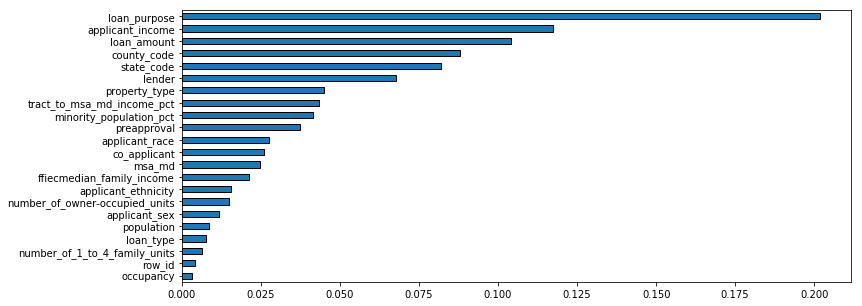

In [14]:
feature_importances = pd.Series(rfr_feature_importances, index = train.columns)
n_features = (feature_importances>0).sum()
feature_importances.sort_values().tail(30).plot(kind="barh", edgecolor="black", color="#1F77B4", figsize=(12,5));
print("Feature importances out of " + str(n_features) + " total features")

In [15]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb =  xgb.fit(X_train, y_train)

# score 
print(xgb.score(X_train, y_train))

0.69015


C:\Users\L.Spencer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
# apply the model to the test set and output score
xgb.score(X_test, y_test)

C:\Users\L.Spencer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.68847

In [17]:
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
gnb = gnb.fit(X_train, y_train)

# score 
print(gnb.score(X_train, y_train))

0.60119


In [18]:
test = pd.read_csv("test_values.csv")

In [19]:
test.fillna(test.mean(), inplace=True)
test.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,1.367028,1.047556,2.070192,1.108330,222.954214,2.764926,181.518910,23.771794,144.715824,...,4.787448,1.461534,101.926536,5411.205196,31.631572,69254.074141,91.813397,1426.559815,1884.863422,3719.194494
std,144337.711634,0.690104,0.231133,0.947980,0.324214,669.975457,0.542847,138.262853,15.978295,100.397007,...,1.022982,0.676923,141.938288,2657.669037,25.732571,14489.955576,13.894878,720.217817,894.114928,1840.072583
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,0.317000,17851.000000,6.215000,3.000000,1.000000,1.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,5.000000,1.000000,49.000000,3807.000000,11.192000,60077.000000,89.073750,962.000000,1324.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,5.000000,1.000000,79.000000,5099.000000,24.576000,68648.000000,100.000000,1363.000000,1797.000000,3713.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,5.000000,2.000000,112.000000,6370.000000,44.445000,74795.000000,100.000000,1750.000000,2271.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,102074.000000,3.000000,408.000000,52.000000,324.000000,...,7.000000,4.000000,10261.000000,34194.000000,100.000000,125244.000000,100.000000,8754.000000,13609.000000,6508.000000


In [20]:
le = LabelEncoder()
test['co_applicant'] = le.fit_transform(test['co_applicant'])
test.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,2,1,3,1,115.0,3,101,16,276,...,1,101.926536,6329.000000,59.536000,69889.000000,85.780000,1874.000000,2410.000000,3791,1
1,1,1,1,1,1,252.0,2,87,20,68,...,1,107.000000,2473.000000,8.050000,65313.000000,100.000000,947.000000,1214.000000,2839,1
2,2,1,1,1,1,270.0,1,-1,-1,-1,...,2,119.000000,5411.205196,31.631572,69254.074141,91.813397,1426.559815,1884.863422,4701,0
3,3,2,1,1,1,179.0,2,376,20,11,...,2,44.000000,4795.000000,29.676000,57766.000000,100.000000,1426.000000,1765.000000,2153,1
4,4,2,1,1,1,36.0,2,254,48,156,...,3,32.000000,5246.000000,5.110000,63332.000000,100.000000,1452.000000,2092.000000,5710,0


In [21]:
test = test.values

In [22]:
# fit the scaler based upon the training set
scaler = StandardScaler().fit(train)

# scale the train features array 
test = scaler.transform(test)

In [23]:
# predicting on the "test" dataset, where sale price is unknown
predict = xgb.predict(test)

print(predict)

[1 1 0 ... 0 0 1]


C:\Users\L.Spencer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
output = pd.DataFrame()
output['row_id'] = y_labels['row_id']
output['accepted'] = predict

In [25]:
output.head()

,row_id,accepted
0,0,1
1,1,1
2,2,0
3,3,1
4,4,0


In [26]:
#output.to_csv("submission.csv", index=False)